# Forecast the sales for 1 year for the furniture products category on the basis of the historical data

* A time-series data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.
* Time-Series Forecasting is the process of using a statistical model to predict future values of a time-series based on past results.
* A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.
* Applications of time series are used in statistics, finance or business applications.


### Patterns in a Time Series
**Trend**
A trend is observed when there is an increasing or decreasing slope observed in the time series. 

**Seasonality**
A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.  

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
#Importing data
df = pd.read_excel(r'Sample - Superstore.xls',header=0)
#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

<Axes: xlabel='Category'>

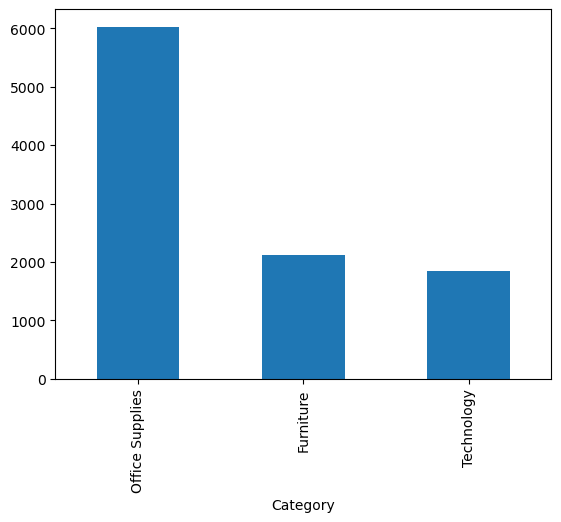

In [4]:
df["Category"].value_counts().plot(kind="bar")

### Filtering the data based on Furniture category

In [5]:
furniture = df[df['Category'] == 'Furniture']
furniture.shape

(2121, 21)

In [6]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
#furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

In [8]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

The data available is from Jan 2014 to Dec 2017 for analysis

### 1. Single Dimensional Data

In [9]:
furniture=furniture[["Order Date","Sales"]]
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [10]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


### 2. Sorting the date/time into chronological order

In [11]:
furniture = furniture.sort_values('Order Date',ascending=True)
#furniture.isnull().sum()
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [12]:
furniture.head(30)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [13]:
furniture["Order Date"].value_counts()

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

### 3. Grouping the data based on date/time

In [14]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [15]:
furniture.head(30)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


### 4,. Set date/time as index of the data

In [16]:
furniture = furniture.set_index('Order Date')

In [17]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [18]:
furniture.shape

(889, 1)

### 5. Equally spaced date/time

In [19]:
y = furniture['Sales'].resample("MS").mean()

In [20]:
y.shape

(48,)

In [21]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

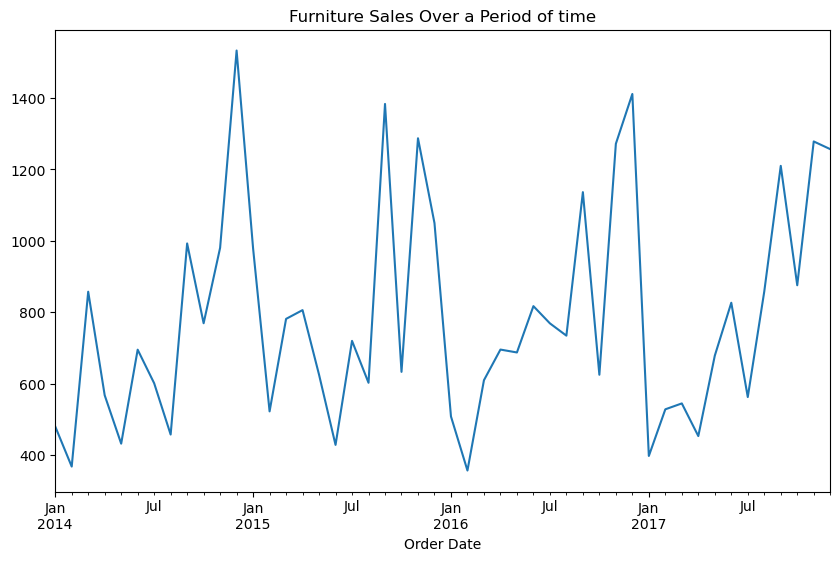

In [22]:
y.plot(figsize=(10, 6))
plt.title("Furniture Sales Over a Period of time")
plt.show()

### Train Test split - Manually

In [23]:
#Training Data
train=y.loc[:'2016-12-01']
train.tail()
#train.shape

Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [24]:
test=y.loc['2017-01-01':]
test.head()

Order Date
2017-01-01    397.602133
2017-02-01    528.179800
2017-03-01    544.672240
2017-04-01    453.297905
2017-05-01    678.302328
Freq: MS, Name: Sales, dtype: float64

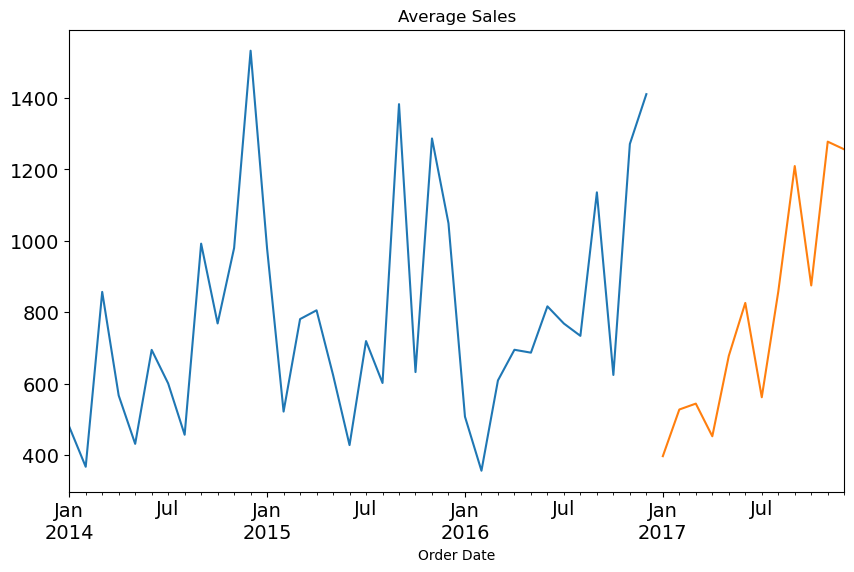

In [25]:
#Plotting data
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

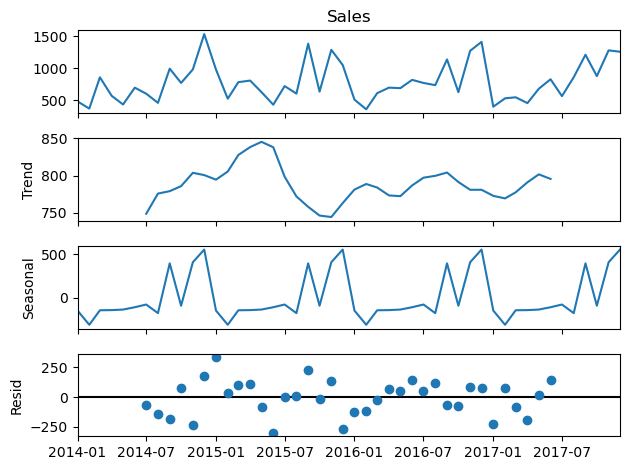

In [26]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


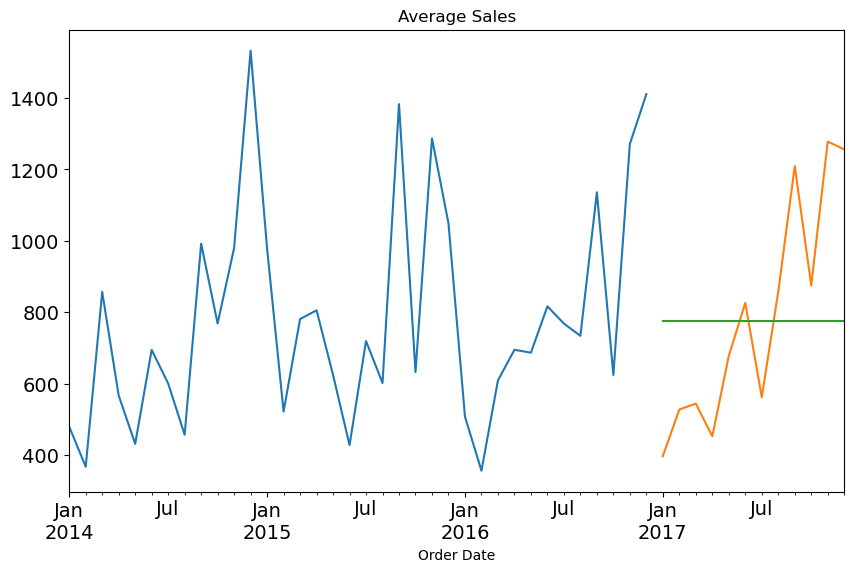

In [27]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.05)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [28]:
Exp_Smooth.SES

2017-01-01    776.551572
2017-02-01    776.551572
2017-03-01    776.551572
2017-04-01    776.551572
2017-05-01    776.551572
2017-06-01    776.551572
2017-07-01    776.551572
2017-08-01    776.551572
2017-09-01    776.551572
2017-10-01    776.551572
2017-11-01    776.551572
2017-12-01    776.551572
Freq: MS, dtype: float64

In [29]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

423.27796135543673

In [30]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

303.6937203391622


C:\Users\Admin\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


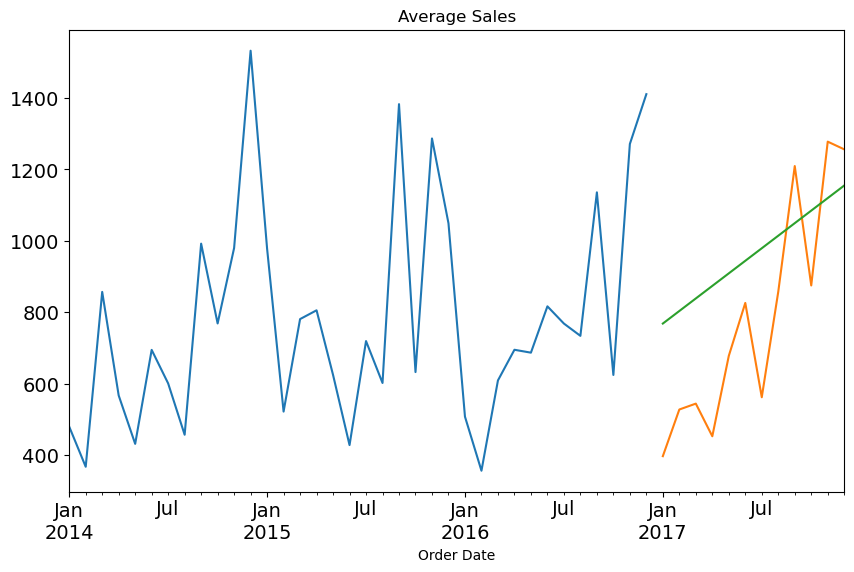

In [31]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.4)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [32]:
fit1.aic

448.64214470173863

In [33]:
Holt_df['Holt_linear']

2017-01-01     768.756943
2017-02-01     803.873271
2017-03-01     838.989600
2017-04-01     874.105929
2017-05-01     909.222257
2017-06-01     944.338586
2017-07-01     979.454914
2017-08-01    1014.571243
2017-09-01    1049.687572
2017-10-01    1084.803900
2017-11-01    1119.920229
2017-12-01    1155.036557
Freq: MS, dtype: float64

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test,Holt_df['Holt_linear'] ))
print(rms)

265.7787962083942


In [35]:
import warnings 
warnings.filterwarnings("ignore")

In [36]:
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #smoothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic

KeyboardInterrupt: 

In [ ]:
"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
        
"""

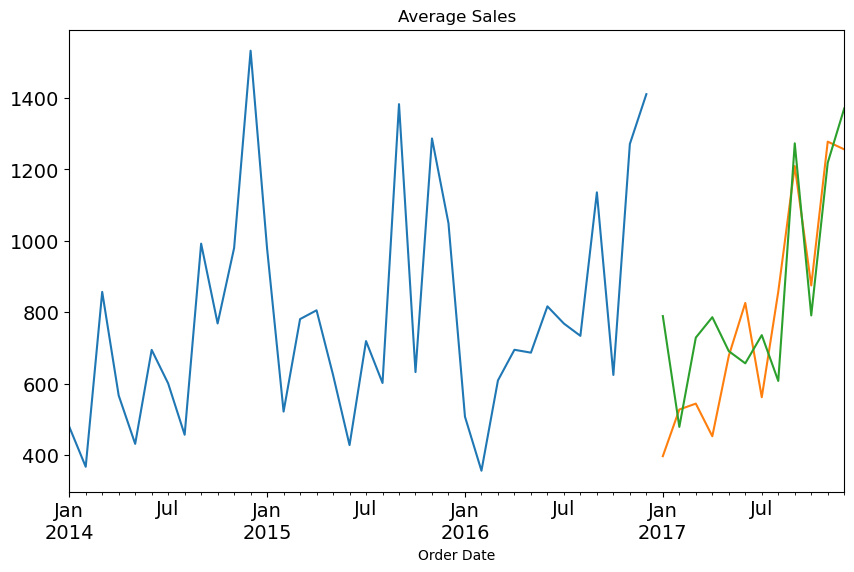

In [37]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [38]:
fit1.aic

392.39062473148135

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter']))
print(rms)

193.7115308386924


In [40]:
Holt_Winter_df['Holt_Winter']

2017-01-01     789.680002
2017-02-01     479.584746
2017-03-01     729.439092
2017-04-01     786.559971
2017-05-01     691.434912
2017-06-01     657.425831
2017-07-01     736.375203
2017-08-01     608.142531
2017-09-01    1273.170681
2017-10-01     791.498413
2017-11-01    1218.795003
2017-12-01    1370.720625
Freq: MS, dtype: float64

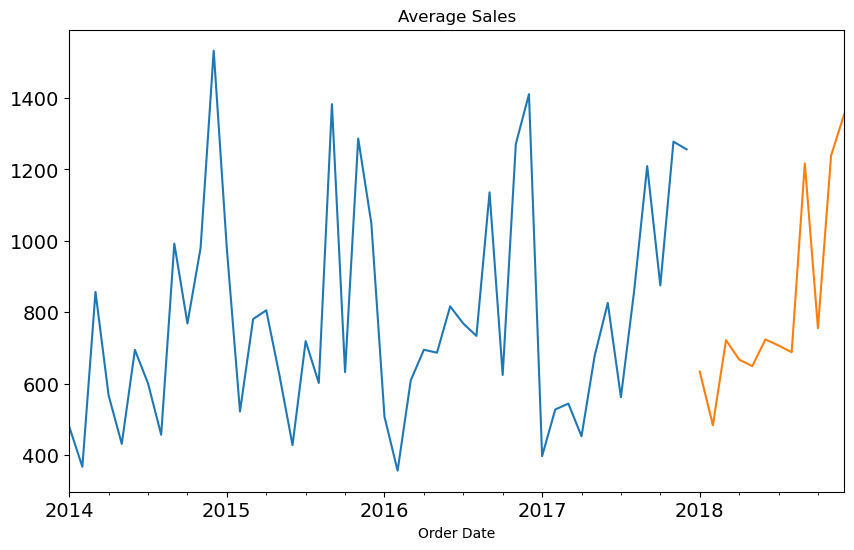

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
#Y_predictions = fit1.predict(start=pd.to_datetime('2017-01-31'))
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [42]:
Y_predictions

2018-01-01     634.610051
2018-02-01     484.385986
2018-03-01     722.211499
2018-04-01     668.084427
2018-05-01     649.422006
2018-06-01     724.302087
2018-07-01     707.463743
2018-08-01     688.555938
2018-09-01    1216.975767
2018-10-01     755.936340
2018-11-01    1239.032471
2018-12-01    1354.748692
Freq: MS, dtype: float64

In [43]:
Y_predictions.to_excel("TimeSeriesOutput.xlsx", header=["Sales"], index=True)

### ARIMA - Auto Regressive Integrated Moving Average
* ARIMA stands for Autoregressive Integrated Moving Average Model. It belongs to a class of models that explains a given time series based on its own past values -i.e.- its own lags and the lagged forecast errors. The equation can be used to forecast future values. Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.
* So, ARIMA, short for AutoRegressive Integrated Moving Average, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.
* ARIMA Models are specified by three order parameters: (p, d, q),
where,

* p is the order of the AR term

* q is the order of the MA term

* d is the number of differencing required to make the time series stationary

* **AR(p) Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period. An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
* **I(d) Integration** – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
* **MA(q) Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

#### Types of ARIMA Model
**ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages  
**SARIMA** : Seasonal ARIMA  
**SARIMAX** : Seasonal ARIMA with exogenous variables  
If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for Seasonal ARIMA.

In [44]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [ ]:
#p+q+P+Q<=10
#p+q<=3

In [ ]:
#pip install pmdarima --user

In [ ]:
!pip install pmdarima

In [45]:
import pmdarima as pm

In [46]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.13 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.22 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.27 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.09 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.29 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.17 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.31 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=1.57 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=1.73 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.51 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=1.40 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.55 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [47]:
model.aic()

489.4176261246746

In [62]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

In [55]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

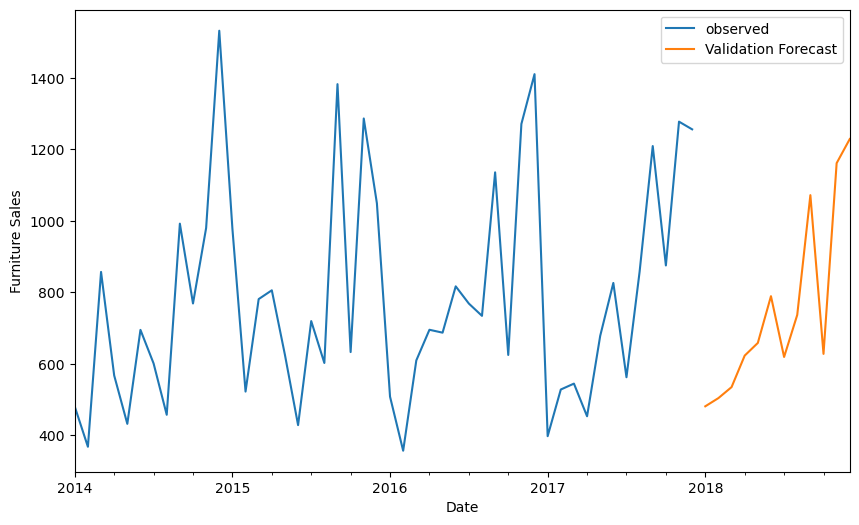

In [64]:
#pred = model.get_prediction(start=pd.to_datetime("2017-02-01")) 
pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()


In [65]:
pred.predicted_mean

2018-01-01     481.175782
2018-02-01     504.162671
2018-03-01     534.896811
2018-04-01     623.058252
2018-05-01     658.537447
2018-06-01     789.387677
2018-07-01     619.269519
2018-08-01     736.930522
2018-09-01    1072.136422
2018-10-01     627.864101
2018-11-01    1161.662892
2018-12-01    1229.291166
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test,Y_pred))
print(rms)


208.64225876043943


In [66]:
pred.predicted_mean.to_excel("TimeSeriesOutput_ARIMA.xlsx",header="Sales",index=True)